<a href="https://colab.research.google.com/github/AzizJohn/DataScience/blob/main/portfolio_modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
662,8,167,106,46,231,37.6,0.165,43,1
304,3,150,76,0,0,21.0,0.207,37,0
411,1,112,72,30,176,34.4,0.528,25,0
220,0,177,60,29,478,34.6,1.072,21,1
469,6,154,78,41,140,46.1,0.571,27,0
34,10,122,78,31,0,27.6,0.512,45,0
515,3,163,70,18,105,31.6,0.268,28,1
586,8,143,66,0,0,34.9,0.129,41,1
208,1,96,64,27,87,33.2,0.289,21,0
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df.corr().abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

ML ga tayyorlaymiz

In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

ML

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = knn.predict(X_test)

Baholash 

Jaccard Index

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.4520547945205479

Confusion Matrix

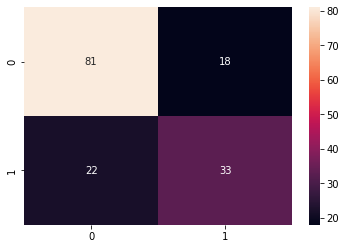

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()  

In [ ]:
confusion_matrix(y_test, y_predict)

array([[81, 18],
       [22, 33]])

Precision, Recall, F1

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("precision=", precision, "\n recall=", recall, "\n f1=", f1, " \n accuracy=", accuracy)

precision= 0.6470588235294118 
 recall= 0.6 
 f1= 0.6226415094339622  
 accuracy= 0.7402597402597403


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



Cross-validation yordamida tekshiramiz

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       500
           1       0.64      0.55      0.59       268

    accuracy                           0.73       768
   macro avg       0.71      0.69      0.70       768
weighted avg       0.73      0.73      0.73       768



Eng yaxshi k ni topish
for yordamida

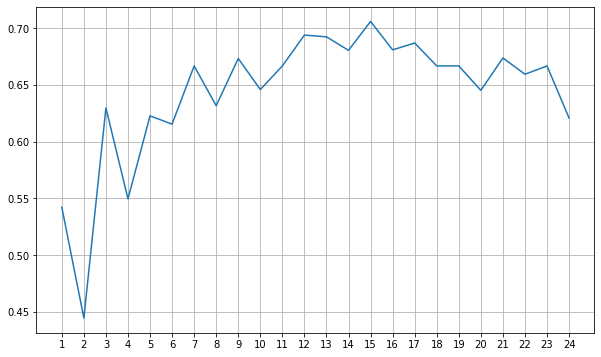

In [ ]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

Grid Search yordamida k ning eng yaxshi qiymatini topish

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [ ]:
knn_gscv.best_score_

0.7669892199303965

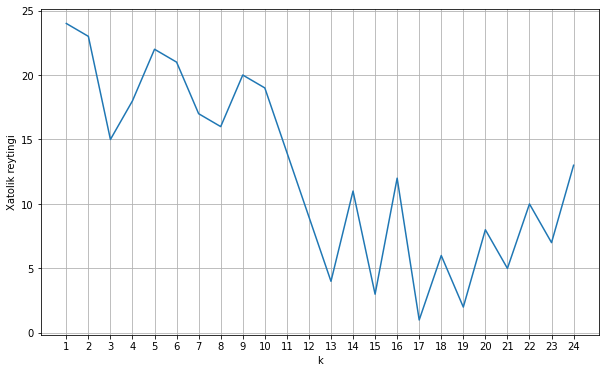

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

qayta ishlash ML qismini boshqa k bilan


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_predict = knn.predict(X_test)

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.5230769230769231

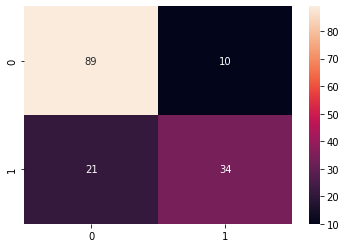

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()  

In [ ]:
confusion_matrix(y_test, y_predict)

array([[89, 10],
       [21, 34]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("precision=", precision, "\n recall=", recall, "\n f1=", f1, " \n accuracy=", accuracy)

precision= 0.7727272727272727 
 recall= 0.6181818181818182 
 f1= 0.6868686868686869  
 accuracy= 0.7987012987012987


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768

